<a href="https://colab.research.google.com/github/Yunho-seo/education_center6/blob/main/01_1_1%EC%9D%BC%EC%B0%A8_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
numpy.random.seed(7)
dataframe = pandas.read_csv('/content/drive/MyDrive/passengers.csv',  # 파일 로드
                            usecols = [1], engine = 'python', skipfooter = 3)  # 두번째 열만 사용, python 엔진, 파일 끝 3개 행 건너뛰기
dataset = dataframe.values  # 데이터프레임을 numpy 배열로 변환
dataset = dataset.astype('float32')  # 타입 변환
train_size = int(len(dataset) * 0.67)  # 전체 데이터셋의 67% 학습 데이터, 나머지 33%은 테스트 -> len(), 슬라이싱으로 분해
                                       # 시계열 데이터는 랜덤으로 처리할 수 없다.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))  # 96 48
train[:10]

96 48


array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [23]:
# window size (데이터를 보는 사이즈 : 다음 데이터에 영향을 미치는 기수)
def create_dataset(dataset, look_back = 1):  # look_back : 시간 간격
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):  # dataset에서 look_back과 1을 뺀 값만큼 반복 (데이터셋 생성 범위)
    a = dataset[i:(i + look_back), 0]  # look_back 시간 간격에 대한 입력 데이터
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])  # 시간 간격 이후의 출력 데이터
  return numpy.array(dataX), numpy.array(dataY)
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()
# 입력 레이어와 hidden 레이어를 추가한다.
# Dense : fully connected 레이어, 8개의 히든 레이어 뉴런수
model.add(Dense(8, input_dim = look_back, activation = 'relu'))  # 2x8 가중치 + bias
model.add(Dense(1))  # 단일뉴런, 8x1 가중치
model.compile(loss = 'mean_squared_error', optimizer = 'adam')  # 손실 함수 : 평균 제곱 오차, Adam 옵티마이저
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)  # 입출력 데이터를 학습(모델)

trainScore = model.evaluate(trainX, trainY, verbose = 0)  # 학습 데이터의 모델 성능 평가
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)  # 테스트 데이터의 모델 성능 평가
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# Train Score: 757.65 MSE (27.53 RMSE)
# Test Score: 3536.20 MSE (59.47 RMSE)

In [7]:
# NLP (natural language)

In [25]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text = '해보지 않으면 해낼 수 없다'
result = text_to_word_sequence(text)
print('\n원문:\n', text)
print('\n토큰화:\n', result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [26]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
        '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
        '토큰화 한 결과는 딥러닝에서 사용할 수 있습니다.',
        ]
token = Tokenizer()  # 토큰 데이터 인스턴스
token.fit_on_texts(docs)
print('\n단어 카운트:\n', token.word_counts)  # 단어별 개수
print('\n문장 카운트:', token.document_count)  # 문장의 개수
print('\n각 단어가 몇개의 문장에 포함되어 있는가:', token.word_docs)  # 단어가 문장에 들어있는가?
print('\n각 단어에 매겨진 인덱스 값:\n', token.word_index)  # 17개의 단어 -> 인덱스
# 이미지, 텍스트, 사운드 => 신경망에서는 수자화 되어야 한다.
# 텍스트 모델이 예측을 한다면, 결과는 숫자로 예측한다.


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트: 3

각 단어가 몇개의 문장에 포함되어 있는가: defaultdict(<class 'int'>, {'텍스트의': 2, '나누어': 1, '먼저': 1, '각': 1, '합니다': 1, '토큰화': 3, '단어를': 1, '딥러닝에서': 2, '해야': 1, '인식됩니다': 1, '단어로': 1, '수': 1, '있습니다': 1, '사용할': 1, '결과는': 1, '한': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


In [27]:
# 영화 평 : 100,000개
docs = ['너무 재밌네요', '최고예요', '참 잘 만는 영화예요', '추천하고 싶은 영화입니다.',
        '한번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요',
        '연기가 어색해요', '재미없어요']
classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])  # 긍정 5, 부정 5
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)  # 문장을 -> 시퀀스(sequences)로 변경한다. (인덱스 번호를 사용)
print('\n리뷰 텍스트, 토큰화 결과:\n', x)
x_test = token.sequences_to_texts(x)  # 원문
print('텍스트:\n', x_test)
padded_x = pad_sequences(x, 4)  # 신경망은 행렬곱연산 -> 사이즈가 동일해야 함
                                # 시퀀스 데이터 패팅 : padded_x에 결과 저장. 시퀀스의 길이 : 4(패딩 뒤)
print('\n패딩 결과:\n', padded_x)
print('\n딥러닝 모델 시작: ')
word_size = len(token.word_index) + 1

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만는': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
텍스트:
 ['너무 재밌네요', '최고예요', '참 잘 만는 영화예요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요']

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]

딥러닝 모델 시작: 


In [28]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력
model = Sequential()
# text는 one-hot encoding 가능
# 21인 경우, 21차 / 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
# 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
# 희소행렬 / sparse 행렬로 표현 => 학습결과 좋지 못함
model.add(Embedding(word_size, 8 ,input_length=4)) # 8개의 자리수(벡터)로 바꾸기 / embedding() : 두 단어의 관계성 파악하기
# 고차원을 저차원으로 차원축소
# 밀집 행렬로 재표현

model.add(Flatten())  # 다차원 임베딩 벡터를 평탄화
model.add(Dense(1,activation='sigmoid'))  # 출력 레이어 추가
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.fit(padded_x, classes, epochs=20)  # 입력데이터 padded_x, 레이블 classes, 학습반복횟수 epochs
print('\n Accuracy: %.4f' % (model.evaluate(padded_x,classes)[1])) # 모델의 정확도 평가하고 출력 / 90% 정확도 

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6858 - accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6783 - accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6758 - accuracy: 0.9000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6733 - accuracy: 0.9000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6708 - accuracy: 0.9000
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6684 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6659 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6634 - accuracy: 0.9000
Epoch 11/20
1/1 [==============

In [12]:
# RNN

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters  # reuters 뉴스 기사 데이터셋 로드
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
# 뉴스 기사
# 1000개의 단어만 사용하여, 뉴스 기사를 indexing (1000개 단어 넘는 기사는 미출력)
# 원본 데이터가 아닌 mapping된 숫자만 제공
# token.texts_to_sequences(docs)된 데이터를 제공한다.
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000,  # 사용할 단어 최대개수 : 1000개
                                                         test_split = 0.2)  # 테스트 데이터의 비율 (20%)
category = numpy.max(Y_train) + 1  # 카테고리(클래스) 개수를 확인
print(category, "카테고리")  # 경제, 정치, 문화 ..........
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])  # 첫번째 학습용 뉴스기사의 내용 확인 

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [30]:
# 단어의 숫자가 중요, 패딩이 중요하다. 단어의 인덱스로 재표현한다. (패딩 : 시퀀스 데이터 길이를 일정하게 하는 작업)
# 100단어로 표현되는 기사 (100단어보다 많으면 삭제, 100단어보다 적으면 0으로 채운다(패딩))
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)
y_train = to_categorical(Y_train)  # y_train을 원-핫 인코딩한다 (각 클래스를 0 또는 1로 표현)
y_test = to_categorical(Y_test)

In [31]:
model = Sequential()
# 단어가 분류 -> 100사이즈의 벡터로 표현
model.add(Embedding(1000, 100))  # 입력되는 100 사이즈 / 입력차원이 1000이고, 출력차원이 100인 임베딩 사용 (밀집 벡터로 임베딩)
# LSTM망 -> 텍스트의 특징을 추출 (가중치를 이용 : 이전 텍스트를 고려한 특징)
model.add(LSTM(100, activation = 'tanh'))  # 출력되는 100 사이즈 / LSTM 레이어 추가 (LSTM : 순환 신경망, 시퀀스 데이터 처리)
# FFNN망
model.add(Dense(46, activation = 'softmax'))  # 출력 레이어 추가 / 46개의 클래스(문서)(출력차원이 46), softmax()로 다중 클래스 분류

Epoch 1/20
90/90 [==============================] - 16s 141ms/step - loss: 2.5948 - accuracy: 0.3674 - val_loss: 2.3119 - val_accuracy: 0.4764
Epoch 2/20
90/90 [==============================] - 3s 36ms/step - loss: 2.1163 - accuracy: 0.4674 - val_loss: 2.0537 - val_accuracy: 0.5102
Epoch 3/20
90/90 [==============================] - 2s 26ms/step - loss: 1.9824 - accuracy: 0.5088 - val_loss: 1.8872 - val_accuracy: 0.5067
Epoch 4/20
90/90 [==============================] - 4s 40ms/step - loss: 1.7584 - accuracy: 0.5539 - val_loss: 1.6954 - val_accuracy: 0.5677
Epoch 5/20
90/90 [==============================] - 2s 22ms/step - loss: 1.6770 - accuracy: 0.5664 - val_loss: 1.7115 - val_accuracy: 0.5570
Epoch 6/20
90/90 [==============================] - 2s 21ms/step - loss: 1.5962 - accuracy: 0.5917 - val_loss: 1.6370 - val_accuracy: 0.5922
Epoch 7/20
90/90 [==============================] - 3s 37ms/step - loss: 1.5059 - accuracy: 0.6245 - val_loss: 1.6828 - val_accuracy: 0.5788
Epoch 8/20


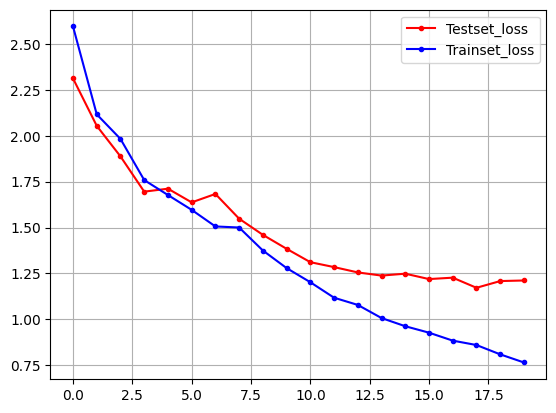

In [32]:
model.compile(loss = 'categorical_crossentropy',  # 손실 함수
              optimizer = 'adam',  # 옵티마이저
              metrics = ['accuracy'])  # 평가 지표 : Accuracy
# 모델 학습 (학습 데이터로 x_train, y_train / 배치 크기는 100, 20번 반복학습)
history = model.fit(x_train, y_train, batch_size = 100, epochs = 20, validation_data = (x_test, y_test))
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))  # 테스트 데이터에 대한 평가를 수행
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()

In [33]:
from tensorflow.keras.datasets import imdb
# Conv1D : Text에서 주변 데이터를 고려할 때에 사용
# Conv3D : 동영상에서 특징을 추출할 때에 사용
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Activation

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
# 전체 단어 수 : 5000개 (데이터셋에서 자주 등장하는 단어 개수를 5000개로 제한)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)
# 영화 평에 대한 문장의 단어수가 100개 
# 패딩 / 모든 리뷰 데이터 길이를 100으로, 비어있으면 0으로 채운다.
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

In [34]:
# 하나의 영화평은 100개의 단어로 구성됨 (maxlen = 100)
# 영화평은, 단어의 인덱스로 표현되어 있다 (위치로 학습하면 안된다.)
# 단어로 재표현 (원-핫 인코딩) => 100 자리의 벡터로 임베딩
model = Sequential()
model.add(Embedding(5000, 100))  # 벡터로 변환 (5000x100)
# 100개의 단어가 100개의 벡터로 변환되어서 입력된다. (100x100)
model.add(Dropout(0.5))
# convolution의 의미는, 이미지에서 주변값을 고려한 특징
# 단어의 주변값을 고려한 특징이다.
# 주변 5개의 단어를 고려한 값으로 재표현된다.
# padding은 same, valid
# 100 - 5 + 1 = 96으로 나간다, 64개의 필터
# 5 * 64
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))  # 64개의 필터, 필터 크기는 5(5개)
# 32064
# 5 x 64 * 100 + 64
# 100 x 100 => 출력 차수는 100 x 96
model.add(MaxPooling1D(pool_size = 4))  # MaxPooling1D 레이어 / pooling window = 4
model.add(LSTM(55))  # LSTM 레이어 / 나가는 특징의 사이즈 : 단어마다 셀(cell)이 필요 (셀 100개) / 55개의 뉴런을 가진 LSTM 셀을 사용한다.
# 한 셀에 (55x4) 행렬이 필요함. (가중치가 4개 필요)
# 맨 마지막에 나가는 것은, 100개에서 특징을 잡아 마지막 한 개가 출력하는 hidden layer의 값이 출력된다.
# 마지막 차수는 55
# 55 x 1 + 1(bias)
model.add(Dense(1))  # 마지막에 긍정(pos), 부정(neg)을 판별 / 출력 뉴런의 개수를 1로 설정
model.add(Activation('sigmoid'))  # 출력을 0과 1 사이 확률로 변환하여 이진분류 수행
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

Epoch 1/5
250/250 [==============================] - 38s 125ms/step - loss: 0.4550 - accuracy: 0.7664 - val_loss: 0.3694 - val_accuracy: 0.8394
Epoch 2/5
250/250 [==============================] - 11s 43ms/step - loss: 0.2974 - accuracy: 0.8749 - val_loss: 0.3335 - val_accuracy: 0.8558
Epoch 3/5
250/250 [==============================] - 6s 24ms/step - loss: 0.2532 - accuracy: 0.8966 - val_loss: 0.3271 - val_accuracy: 0.8577
Epoch 4/5
250/250 [==============================] - 5s 18ms/step - loss: 0.2142 - accuracy: 0.9146 - val_loss: 0.3295 - val_accuracy: 0.8544
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3700 - accuracy: 0.8495

 Test Accuracy: 0.8495


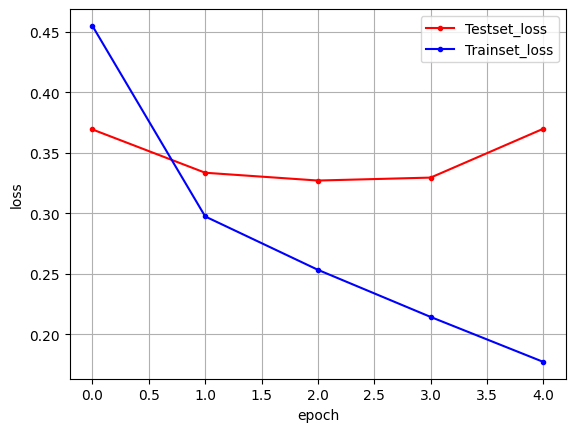

In [35]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 5,  # 100개의 문서(batch_size, 영화평), 5번 반복학습
                    validation_data = (x_test, y_test))  # 각 에포크마다 모델의 성능을 평가
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))  # 0.8540 정확도 / 감성 분석
y_vloss = history.history['val_loss']  # 검증 데이터 손실값
y_loss = history.history['loss']  # 학습 데이터 손실값
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')   # 빨간색 : 테스트 데이터(검증 데이터) 손실값
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')  # 파란색 : 학습 데이터 손실값
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
print(type(x_train))  # 학습 데이터의 데이터타입
print(x_train.shape)  # 차원수 (25000, 100) : 25000개의 리뷰와, 리뷰 길이는 100
print(x_train[20001])  # 인덱스 20001번에 해당하는 리뷰
print(type(x_train[20000]))  # 인덱스 20000번에 해당하는 리뷰의 타입 출력
print(y_train[1])  # y_train 변수에서 인덱스 1번에 해당하는 레이블 값 출력 (positive or negative)
# dictionary
dictionary = imdb.get_word_index(path = 'imdb_word_index.json')  # IMDB 영화리뷰 데이터셋에 대한 단어 인덱스 사전
type(dictionary)
print(len(dictionary))  # 사전의 크기, 88584
imdb_key = dictionary.keys()  # 사전의 키 값을 가져온다 (imdb 데이터셋에 등장하는 단어들)
print(type(imdb_key))

keytotal = list(imdb_key)  # 사전의 키 값을 리스트로 변환
sentance = []
for x, num in enumerate(x_train[1]):  # 영화평 / x_train[1]에서 각 단어의 인덱스와 해당 인덱스 값을 가져옴
  res = keytotal[x]  # 인덱스에 해당하는 단어를 가져옴
  sentance.append(res)  
print(sentance)

<class 'numpy.ndarray'>
(25000, 100)
[  87   51  575   36   26  502    8   79  101  156    5 1507   36  181
    4  118    7   68   58   21  820  910 1030    8    2  183   56   11
 2716    7   68    2 4697   10   10  910   70 4146    4  118  927    4
  118 1180    5  907   21  131   36    2  183   56   14   20    9  595
    4  619  155    9   15   13 1781  910   11   68    2  127   24   60
  124   54    6   20    9   52   42   78   10   10   12    9   64  688
    8    4  676    7    4  156   15   13   70   60  202   12    6  342
    7  158]
<class 'numpy.ndarray'>
0
88584
<class 'dict_keys'>
['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling', "hold's", 'comically', 'localized', 'disobeying', "'royale", "harpo's", 'canet', 'aileen', 'acurately', "diplomat's", 'rickman', 'arranged', 'rumbustious', 'familiarness', "spider'", 'hahahah', "wood'", 'transvestism', "hangin'", 'bringing', 'seamier', 'wooded', 'bravora', 'grueling', 'wooden', 'wedne

In [37]:
from tensorflow import keras
imdb = keras.datasets.imdb  # imdb 데이터셋
# imdb 데이터셋에서 학습 데이터와 테스트 데이터를 로드
# 자주 등장하는 상위 10000개 단어만 사용하도록 설정 (데이터셋 단어는 10000개로 제한)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000)

In [38]:
from tensorflow.keras.datasets import imdb
word_index = imdb.get_word_index()  # imdb 데이터셋의 단어 인덱스 가져오기
word_index = {k:(v + 3) for k, v in word_index.items()}  # 단어 인덱스 수정
# 기존의 인덱스 값에 3을 더하여 새 인덱스를 만들기 (이때 0, 1, 2, 3은 특별한 용도 -> 실제 단어들의 인덱스는 4부터 시작)
word_index["<PAD>"] = 0    # padding
word_index["<START>"] = 1  # start
word_index["<UNK>"] = 2    # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  # 단어 인덱스와 단어 매핑 dict
# 주어진 텍스트를 디코딩하여 원래의 리뷰 텍스트로 반환하는 함수이다.
# 텍스트 리스트에서 각각의 인덱스를 찾아 해당하는 단어로 변환하고 공백으로 구분하여 문자열로 반환
def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [39]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [40]:
# keras.preprocessing.sequence.pad_sequences() : 패딩 작업을 수행 (동일한 길이로 패딩을 추가)
# train_data와 test_data는 모두 같은 길이의 데이터로 패딩된 상태이다. <PAD> 토큰으로 길이를 맞춤.
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value = word_index["<PAD>"],  # 패딩에 사용할 값
                                                        padding = 'post',  # 패딩을 시퀀스 끝에 추가
                                                        maxlen = 256)  # 패딩 수행 후 시퀀스의 최대길이
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value = word_index["<PAD>"],
                                                       padding = 'post',
                                                       maxlen = 256)

In [41]:
vocab_size = 10000  # 단어집합의 크기
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))  # 16차원, 가변길이 시퀀스 받음
# 차원축소
# model.add(keras.layers.GlobalAveragePooling1D())  # conv에서 사용하던 풀링을 데이터 누출 없는 차원 축소 용도
# 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))),  # 이중으로 특징을 추출 (열방향, 행방향)
model.add(keras.layers.Dense(16, activation='relu'))  # 16개의 뉴런 (hidden layer)
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력 레이어 (긍정, 부정 리뷰 예측)
model.summary()  # 모델의 구조를 요약하여 출력

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 164,769
Trainable params: 164,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# attention(RNN + attention 관계성 망) / self-attention (RNN을 제거하고, 자체 attention)
# BahdanauAttention
# image - captioning

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

In [4]:
# MS_COCO 데이터셋
# 82,000장의 이미지 / 이미지 당 5개의 캡션(Text))이 있음.
# image captioning (seq2seq 망을 사용)
# attention망을 구축

In [3]:
# 주석 데이터
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
      cache_subdir = os.path.abspath('.'),
      origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
      extract = True)
  annotation_file = os.path.dirname(annotation_zip) + '/annotations/captions_train2014.json'
  os.remove(annotation_zip)

# Download image files (이미지 데이터)
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                    cache_subdir = os.path.abspath('.'),
                    origin = 'http://images.cocodataset.org/zips/train2014.zip',
                    extract = True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

13510573713/13510573713 [==============================] - 1025s 0us/step


In [4]:
with open(annotation_file, 'r') as f:  # 주석(annotation) 데이터 읽어오기
  annotations = json.load(f)
all_captions = []  # 캡션
all_img_name_vector = []  # 이미지 위치
for annot in annotations['annotations']:
  caption = '<start> ' + annot['caption'] + ' <end>'  # 시작 태그와 종료 태그를 추가하여 캡션 문자열 생성
  # seq2seq = encoder + decoder
  # 끝을 표시해야되는 이유는, 패딩을 해 놓아서 단어가 없을 수도 있기에.
  # start를 넣어야 하는 이유는, encoder에서 마지막에 출력되는 state가 decoder의 첫번째 입력
  image_id = annot['image_id']  # id를 파일 위치로 변경 / 이미지 파일의 전체 경로 생성
  full_coco_image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (image_id)  # 이미지 파일 경로 형식
  all_img_name_vector.append(full_coco_image_path)
  all_captions.append(caption)
train_captions, img_name_vector = shuffle(all_captions,  # 생성된 캡션과 이미지 파일 경로를 섞기(shuffle)
                                          all_img_name_vector,
                                          random_state = 1)
num_examples = 30000  # 30000개 예시로 설정하고 그만큼 캡션과 이미지 파일경로를 선택
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]

In [5]:
# 이미지 로딩
def load_image(image_path):
  img = tf.io.read_file(image_path)  # 이미지 파일을 이진 데이터(binary)로 읽기
  img = tf.image.decode_jpeg(img, channels = 3)  # jpeg 이미지 디코딩, 채널수 3(RGB)
  img = tf.image.resize(img, (299, 299))  # 이미지 크기를 (299, 299)로 조정 (inception_v3 모델의 규격)
  # preprocess_input : 이미지 전처리는 사이즈, 정규화(-1 ~ 1)
  # 127.5로 나누고 1을 빼주면 -1 ~ 1 사이 정규화
  img = tf.keras.applications.inception_v3.preprocess_input(img)  # 이미지를 Inception_v3 모델에 맞게 전처리
        # 이미지를 0과 1사이 범위로 정규화하고 채널별로 평균값을 뺀 후 채널 순서를 RGB에서 BGR로 변경한다.
  return img, image_path

In [6]:
# ConvNet
# InceptionV3(wide) # VGG16(3x3) # ResNet(Residul) # EfficientNet(depth, wider, resolution)
image_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output  # 결과값이 decoder로 입력됨
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)
# 앞단에는 이미지 뒷단에는 텍스트
#          encoder         decoder 

87910968/87910968 [==============================] - 5s 0us/step


In [7]:
encode_train = sorted(set(img_name_vector))
# 데이터셋을 분할
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(  # map() : 병렬 처리, 이미지를 특성 벡터로 변환
    load_image, num_parallel_calls = tf.data.experimental.AUTOTUNE).batch(16)  # load_image() : 이미지 데이터셋 로드하고 전처리
for img, path in image_dataset:  # 16개의 덩어리 (batch 사이즈)
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,  # 학습행렬 형태로 변형 / tf.reshape()
                              # 3차원 데이터
                              (batch_features.shape[0], -1, batch_features.shape[3]))
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode('utf-8')
    np.save(path_of_feature, bf.numpy())  # 학습 시에는 전처리에 신경쓰지 않고 로딩하여 사용
    # np.save() : 특성 벡터를 .npy 파일로 저장한다. 파일 경로는 문자열로 변환됨.

In [8]:
def calc_max_length(tensor):  # 주어진 텐서(tensor)에서 가장 긴 데이터의 길이를 계산하는 함수
  return max(len(t) for t in tensor)  # 계산된 길이들 중 가장 큰 값을 반환 : max()

In [9]:
top_k = 5000  # dict의 단어수 (최대로 고려할 단어 5000개)
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  # oov_token = Tokenizer에 의해 unknown 단어 표시하는 토큰
                                                  oov_token = "<unk>",  # unknown
                                    filters = '!"#$%&()*+.,-/:;=?@[\]^_{|}~ ')  # 토큰화 시 제거할 필터 문자열
tokenizer.fit_on_texts(train_captions)  # 토큰화 수행, 텍스트 데이터 분석하여 단어 인덱스 사전을 생성
train_seqs = tokenizer.texts_to_sequences(train_captions)  # 인덱스를 이용하여 문서를 표현

In [10]:
tokenizer.word_index['<pad>'] = 0  # <pad> 토큰을 0으로 매핑 (패딩 토큰)
tokenizer.index_word[0] = '<pad>'  # tokenizer의 0번 인덱스에 <pad> 매핑 (텍스트로 디코딩)
train_seqs = tokenizer.texts_to_sequences(train_captions)  # 학습 캡션 데이터를 정수로 변환
# 변환된 정수 시퀀스에 패딩 추가하여 길이를 맞춤
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')
# 변환된 정수 시퀀스의 최대길이 계산
max_length = calc_max_length(train_seqs)  # calc_max_length() : 주어진 텐서의 최대길이를 계산하는 함수

In [11]:
# train_test_split() : img_name_vector와 cap_vector를 학습 데이터와 검증 데이터로 분할
# 검증 데이터 20%
img_name_train, img_name_val, cap_train, cap_val = train_test_split(img_name_vector,  
                                                                    cap_vector,
                                                                    test_size = 0.2,
                                                                    random_state = 0)
# img_name_vector : 모든 이미지파일 경로가 저장된 리스트
# cap_vector : 각 이미지에 대해 캡션의 정수 시퀀스(데이터)가 저장된 배열

In [12]:
BATCH_SIZE = 64  # 배치 사이즈
BUFFER_SIZE = 1000  # 데이터 섞을때 사용되는 버퍼의 크기 
embedding_dim = 256  # 256차원 (단어 임베딩)
units = 512  # Attention과 decoder의 유닛 수
vocab_size = top_k + 1  # 단어의 수 
num_steps = len(img_name_train) // BATCH_SIZE  # 학습 데이터의 batch 수
features_shape = 2048  # 이미지특징의 차원수
attention_features_shape = 64  # Attention 매커니즘 특징 64차원

In [13]:
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy')
  return img_tensor, cap

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):  # units : Attention 유닛 수
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)  # Dense 레이어를 사용하여 가중치를 정의
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)
  def call(self, features, hidden):  # RNN 망으로부터 각 단어에 추출된 특성, RNN의 hidden state (디코더 은닉상태)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)  # 차원 확대
    # -1 ~ 1 사이의 값으로 추출 
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
    attention_weights = tf.nn.softmax(self.V(score), axis = 1)  # 분포값
    context_vector = attention_weights * features  # 추출된 특성에 중요도가 고려된 값
    context_vector = tf.reduce_sum(context_vector, axis = 1)
    return context_vector, attention_weights  # 관계성을 고려한 특징벡터, 확률 (합하면 1)

In [16]:
# CNN 망 (이미지를 인코딩하는 CNN_Encoder 클래스)
class CNN_Encoder(tf.keras.Model):
  def __init__(self, embedding_dim):  # embedding_dim : 인코딩된 이미지의 차원
    super(CNN_Encoder, self).__init__()
    # cnn의 결과를 dense로 출력
    self.fc = tf.keras.layers.Dense(embedding_dim)  # Dense layer로, 이미지를 인코딩하는데 사용될 fully connected 정의
  def call(self, x):  # 이미지를 인코딩하는 메서드
    x = self.fc(x)    # 입력으로 받은 이미지를 fully connected layer에 통과시킨다.
    x = tf.nn.relu(x) # relu 활성화함수 적용
    return x          # 인코딩된 이미지 반환

In [17]:
# RNN (텍스트를 생성하는 RNN_Decoder 클래스)
class RNN_Decoder(tf.keras.Model):
  # embedding_dim : 단어 임베딩의 차원 / units : GRU 레이어 유닛수 / vocab_size : 단어집합의 크기
  # 하나의 단어가 표현될 벡터수 / LSTM(GRU)에서 출력되는 특징벡터 / 전체 단어수(dictionary)
  # 로딩되는 문서 내용
  def __init__(self, embedding_dim, units, vocab_size):  # 클래스의 생성자
    super(RNN_Decoder, self).__init__()
    self.units = units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    # RNN(기울기 소실 발생) -> LSTM(Control state, hidden state) (단점 : 복잡함, 계산이 많음)
    # GRU (LSTM을 변형하여, 계산이 적도록 만듬 (내용은 LSTM을 유지))
    # return_sequences = True : 모든 단어로부터 출력되는 특징을 모두 사용하라는 의미
    # return
    self.gru = tf.keras.layers.GRU(self.units, return_sequences = True,
                                   return_state = True,
                                   # 행렬 초기화할 때 random으로 하지만, 초기화 방법을 변경
                                   recurrent_initializer = 'glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)  # FFNN 망
    self.fc2 = tf.keras.layers.Dense(vocab_size)
    self.attention = BahdanauAttention(self.units)
  # 텍스트를 생성하는 메서드
  # x는 입력으로 받음, 이전 시점의 출력 단어 / features : 이미지의 인코딩 벡터
  # hidden : 이전 시점의 은닉 상태
  def call(self, x, features, hidden):
    # attention distribution  분포값
    context_vector, attention_weights = self.attention(features, hidden)  # BahdanauAttention으로 계산
    x = self.embedding(x)  # 입력 단어를 임베딩 벡터로 변환 
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis = -1)  # context vector와 임베딩된 단어 결합
    output, state = self.gru(x)  # output : 시퀀스 / state : 은닉 상태(hidden state)
    x = self.fc1(output)
    x = tf.reshape(x, (-1, x.shape[2]))  # flatten()하는 것 (평탄화)
    x = self.fc2(x)  # tf.keras.layers.Dense(vocab_size)
    return x, state, attention_weights

  def reset_state(self, batch_size):  # hidden state를 초기화하는 메서드
    return tf.zeros((batch_size, self.units))  # batch_size에 맞는 크기로, 0으로 채워진 텐서 반환

In [18]:
# 학습
# seq2seq 망 (번역망) + attention
# 이미지 + 텍스트 => image captioning (인코더, 디코더 객체 사용하여 이미지와 텍스트를 매핑하는 모델 구축)

# 인코더 : 이미지를 입력으로 받아 이미지를 인코딩하는 역할
# embedding_dim을 인자로 받아 fully connected 레이어를 정의
encoder = CNN_Encoder(embedding_dim) 
# 디코더 : 이전 시점의 출력과 이미지 인코딩을 입력으로 받아 다음 단어를 예측하는 역할 
# embedding_dim, units, vocab_size를 인자로 받아
# 임베딩 layer, GRU layer, fully connected 레이어를 정의하고 BahdanauAttention 클래스를 인스턴스
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [19]:
optimizer = tf.keras.optimizers.Adam()  # Adam() : 경사 하강법, 모델의 가중치를 업데이트
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(  # 희소 범주형 크로스 엔트로피 손실 함수
    from_logits = True, reduction = 'none')
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)  # SparseCategoricalCrossentropy
  mask = tf.cast(mask, dtype=loss_.dtype)  # 마스크 생성(패딩된 부분을 고려하기 위해)
  loss_ *= mask  # 손실값을 계산한 후 mask를 적용하여 패딩 부분 손실을 제거한다.
  return tf.reduce_mean(loss_)  # 평균 손실 값을 반환

In [20]:
checkpoint_path = './checkpoints/train'  # 체크포인트 파일 경로
ckpt = tf.train.Checkpoint(encoder = encoder,  # 좋은 모델을 선택
                           decoder = decoder,
                           optimizer = optimizer)
# 체크포인트 매니저 객체 생성 : 체크포인트 관리하는 역할
# ckpt : 체크포인트 / checkpoint_path : 체크포인트 파일 경로 / max_to_keep : 최대 5개로 체크포인트 파일 유지
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep = 5)

In [21]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:  # 이미 저장된 체크포인트가 있는지 검사
 # 체크포인트 파일명은 train-{epoch 번호} 형식, '-'을 기준으로 분할한 후 마지막 요소인 epoch 번호를 추출
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])  # epoch 정보 추출
  # 가장 최근의 체크포인트 파일 복원하여, 모델 가중치와 옵티마이저 상태 복구 (훈련 재개 가능)
  ckpt.restore(ckpt_manager.latest_checkpoint)
loss_plot = []  # 손실 값을 저장하기 위한 리스트

In [26]:
# 훈련 스텝(train step)을 수행하는 함수
@tf.function  # 데코레이터 / Tensorflow 그래프로 변환되어 최적화된 실행이 가능하도록 한다.
def train_step(img_tensor, target):  # 이미지 텐서 / 타겟 변수
  loss = 0 
  hidden = decoder.reset_state(batch_size = target.shape[0])  # 디코더의 은닉 상태 초기화, 배치크기 zero
  # 개수
  # 행을 열로 만듬
  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
  with tf.GradientTape() as tape:  # 미분한 결과값을 저장
    features = encoder(img_tensor)  # 이미지 텐서를 인코더에 입력하여 특성 추출
    for i in range(1, target.shape[1]):  # 타겟 시퀀스 길이만큼 반복하면서 디코더에 입력하고 손실 계산
      predictions, hidden, _ = decoder(dec_input, features, hidden)  # 디코더에 입력, 예측값과 다음 은닉상태 반환
      loss += loss_function(target[:, i], predictions)  # 손실함수 사용하여 예측값 - 실제 타겟 값 비교하여 손실 누적
      dec_input = tf.expand_dims(target[:, i], 1)  # 디코더의 다음 입력으로 타겟 값을 사용
  total_loss = (loss / int(target.shape[1]))  # 계산된 loss를 타겟 시퀀스 길이로 나누어 평균손실 구하기
  # 역전파를 통해 가중치를 수정
  trainable_variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, trainable_variables)  # 미분 / 손실에 대한 변수들의 기울기
  optimizer.apply_gradients(zip(gradients, trainable_variables))  # 기울기를 가중치에 적용한다
  return loss, total_loss  # 손실 값, 평균 손실 값을 반환

In [27]:
EPOCHS = 10
for epoch in range(start_epoch, EPOCHS):  # 데이터가 많음 : 중도에 학습 중지
  start = time.time()  # 학습 시간 측정
  total_loss = 0  # 총 손실(loss) 초기화
  # from_tensor_slice (이미지 파일은 전처리하여 다시 파일로 저장된다.)
  for (batch, (img_tensor, target)) in enumerate(dataset):  # 이미지 + 캡션 (배치 사이즈 : 64)
    batch_loss, t_loss = train_step(img_tensor, target)  # train_step() : 현재 batch의 손실을 계산
    total_loss += t_loss  # 배치 손실을 총 손실에 더한다.
    if batch % 100 == 0:  # 매 100번째 batch마다, 현재 손실을 출력한다.
      print('Epoch {} Batch {} Loss {:.4f}'.format(
          epoch+1, batch, batch_loss.numpy() / int(target.shape[1])))
  loss_plot.append(total_loss / num_steps)  # 현재 epoch의 평균손실을 손실 플롯 리스트에 추가
  if epoch % 5 == 0:  # 매 5번째 epoch마다 모델의 checkpoint를 저장
    ckpt_manager.save()
  print('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                      total_loss / num_steps))  # 현재 epoch의 평균 손실 출력
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))  # epoch의 학습 경과 시간 출력

Epoch 1 Batch 0 Loss 2.0049
Epoch 1 Batch 100 Loss 1.1348
Epoch 1 Batch 200 Loss 0.9628
Epoch 1 Batch 300 Loss 0.8689
Epoch 1 Loss 1.045728
Time taken for 1 epoch 202.37740778923035 sec

Epoch 2 Batch 0 Loss 0.8485
Epoch 2 Batch 100 Loss 0.8816
Epoch 2 Batch 200 Loss 0.7949
Epoch 2 Batch 300 Loss 0.8060
Epoch 2 Loss 0.797416
Time taken for 1 epoch 97.62148427963257 sec

Epoch 3 Batch 0 Loss 0.7392
Epoch 3 Batch 100 Loss 0.7508
Epoch 3 Batch 200 Loss 0.6490
Epoch 3 Batch 300 Loss 0.7523
Epoch 3 Loss 0.724468
Time taken for 1 epoch 106.92348194122314 sec

Epoch 4 Batch 0 Loss 0.6967
Epoch 4 Batch 100 Loss 0.7094
Epoch 4 Batch 200 Loss 0.6221
Epoch 4 Batch 300 Loss 0.7036
Epoch 4 Loss 0.679351
Time taken for 1 epoch 107.4851303100586 sec

Epoch 5 Batch 0 Loss 0.5826
Epoch 5 Batch 100 Loss 0.6581
Epoch 5 Batch 200 Loss 0.6745
Epoch 5 Batch 300 Loss 0.6051
Epoch 5 Loss 0.643403
Time taken for 1 epoch 97.93176674842834 sec

Epoch 6 Batch 0 Loss 0.6155
Epoch 6 Batch 100 Loss 0.6299
Epoch 6 Ba

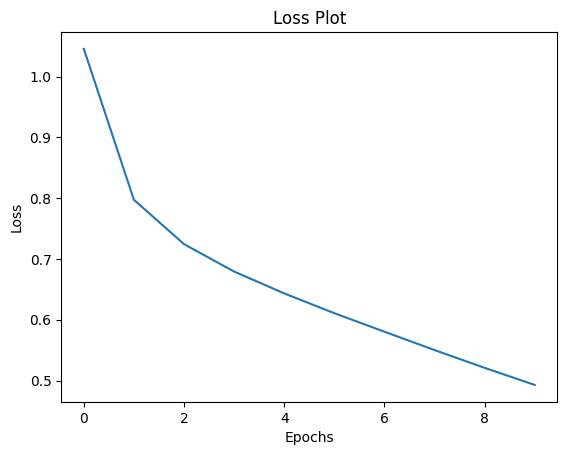

In [28]:
import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()